# Pump Example Notebook
This script shows basic I/O operations that can be performed with this toolkit, as well as some of the basic model and simulation visualization and analysis features.

This script runs these basic operations on the simple model defined in ex_pump.py.

In [13]:
import fmdtools.sim.propagate as propagate
from fmdtools import analyze as an
from ex_pump import Pump
from IPython.display import HTML

### Initial Model Checks
Before seeing how faults propagate, it's useful to see that the model structure is set up correctly and that the system performs as expected.

The 'track' argument specifies what model attributes to log. Specifying `all` will log all attributes.

In [14]:
mdl = Pump(track='all')

One of the easiest ways to visualize this is by viewing the model in the repl, which shows thes states and modes of the component functions and flows.

In [15]:
mdl

pump Pump
FUNCTIONS:
import_ee ImportEE
- ImportEEState(effstate=1.0)
- ImportEEMode(mode=nominal, faults=set())
import_water ImportWater
- ImportWaterMode(mode=nominal, faults=set())
import_signal ImportSig
- ImportSigMode(mode=nominal, faults=set())
move_water MoveWat
- MoveWatStates(eff=1.0)
- MoveWatMode(mode=nominal, faults=set())
export_water ExportWater
- ExportWaterMode(mode=nominal, faults=set())
FLOWS:
ee_1 Electricity flow: EEStates(current=1.0, voltage=1.0)
sig_1 Signal flow: SignalStates(power=1.0)
wat_1 Water flow: WaterStates(flowrate=1.0, pressure=1.0, area=1.0, level=1.0)
wat_2 Water flow: WaterStates(flowrate=1.0, pressure=1.0, area=1.0, level=1.0)

#### Model Structure Visualization

To check that the simulation structures are set up right, the FunctionArchitectureGraph class lets us visualize the function/flow relationships in the model. This helps us answer the questions:
   - are all functions on the graph?
   - are the functions connected with the correct flows?

In [16]:
from fmdtools.analyze.graph import FunctionArchitectureGraph

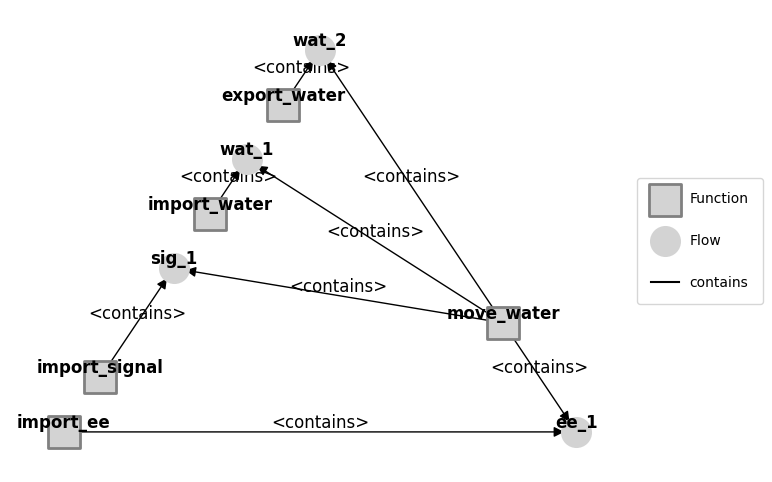

In [17]:
a = FunctionArchitectureGraph(mdl)
fig, ax = a.draw(figsize=(8,6))

Note that a variety of different Classes can be used for model structure visualization, inlcluding `ModelFxnGraph`, `ModelFlowGraph`, and `ModelTypeGraph`. This is further explained in `examples/rover/Model_Structure_Visualization_Tutorial.ipynb`

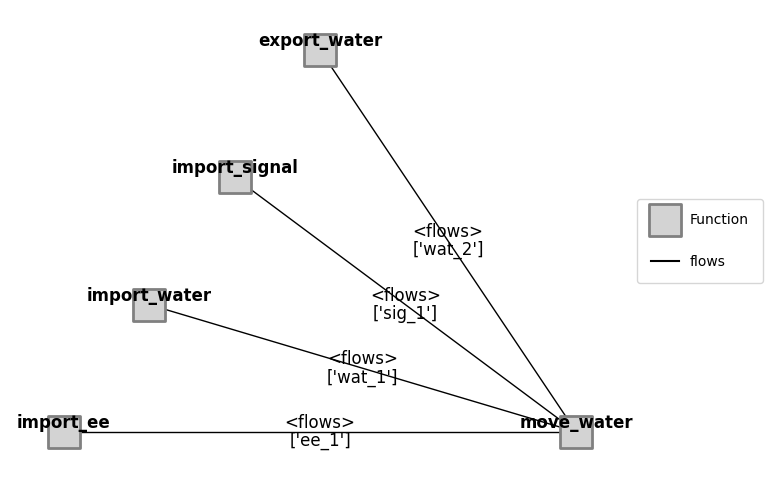

In [18]:
from fmdtools.analyze.graph import FunctionArchitectureFxnGraph
b=FunctionArchitectureFxnGraph(mdl)
fig = b.draw(figsize=(8,6))

#### Nominal Run

The next code runs the model in the nominal state to check to see that the model has been defined correctly.
This helps us verify:
   - if any faults occur in the nominal scenario
   - if the progression of states proceeds as desired over time.

The following code runs the model with no faults to let us do that. The inputs are:
- mdl (the model we imported at the start of the script)
- desired_result (str/list/dict describing what to return in result)
- **kwargs (see docs)

The outputs are:
- result (a `Result` object defined in `analyze.result`)
- mdlhist (a `History` object defined in `analyze.result`)

Both `Result` and `History` have a number of methods that can be readily used to process and analyze simulation results. See:
- [Result documentation](https://nasa.github.io/fmdtools/docs/fmdtools.analyze.html#fmdtools.analyze.result.Result)
- [History documentation](https://nasa.github.io/fmdtools/docs/fmdtools.analyze.html#fmdtools.analyze.result.History)

Many different properties can be requested given the `desired_result` argument ([see full list here](https://nasa.github.io/fmdtools/docs/fmdtools.sim.html#fmdtools.sim.propagate.sim_kwargs)). In this case, we pass a dict with key `graph` and a value `FunctionArchitectureGraph` specifying that we want it to give us a graph view of the `Model`.

In [19]:
result, mdlhist=propagate.nominal(mdl, desired_result={'graph': FunctionArchitectureGraph})

Here we can see where it is in the Result:

In [20]:
result.keys()

dict_keys(['graph'])

In [21]:
result.graph

With these results, we can now plot the graph of results resgraph using:

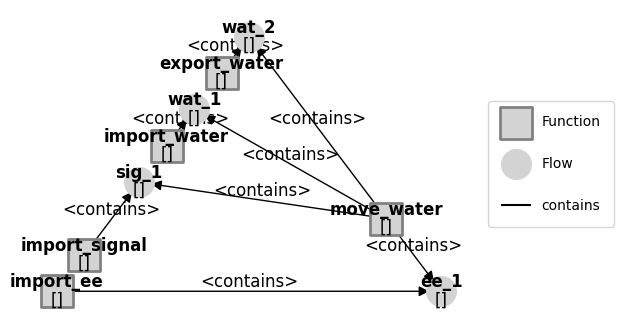

In [22]:
fig = result.graph.draw(figsize=(6,4))

As can be seen, this gives a graphical representation of the functional model with the various flows. Since all of the functions are *grey*, no faults were accidentally introduced in this run.


A model history is additionally returned given our specified tracking options. If none are provided, the `default_track` variable in the `Model` is used (which in this case is set to `all`). See below:

In [23]:
mdlhist

i.finished:                    array(56)
i.on:                          array(56)
flows.ee_1.s.current:          array(56)
flows.ee_1.s.voltage:          array(56)
flows.sig_1.s.power:           array(56)
flows.wat_1.s.flowrate:        array(56)
flows.wat_1.s.pressure:        array(56)
flows.wat_1.s.area:            array(56)
flows.wat_1.s.level:           array(56)
flows.wat_2.s.flowrate:        array(56)
flows.wat_2.s.pressure:        array(56)
flows.wat_2.s.area:            array(56)
flows.wat_2.s.level:           array(56)
fxns.import_ee.s.effstate:     array(56)
fxns.import_ee.m.faults.no_v:  array(56)
fxns.import_ee.m.faults.inf_v: array(56)
fxns.import_water.m.faults.no_wat: array(56)
fxns.import_water.m.faults.less_wat: array(56)
fxns.import_signal.m.faults.no_sig: array(56)
fxns.move_water.i.over_pressure: array(56)
fxns.move_water.s.eff:         array(56)
fxns.move_water.m.faults.mech_break: array(56)
fxns.move_water.m.faults.short: array(56)
fxns.move_water.t.pressure_limit.

We can further look at the states of the model over time using `History.plot_line`:

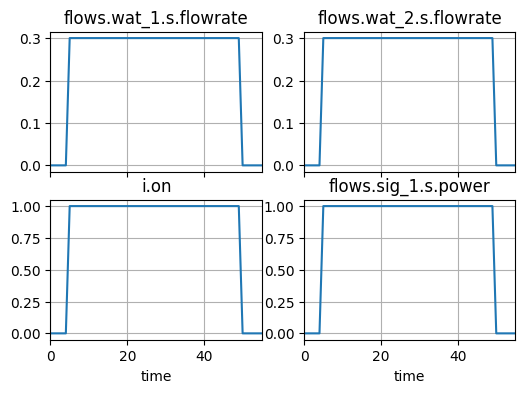

In [24]:
fig, ax = mdlhist.plot_line('flows.wat_1.s.flowrate', 'flows.wat_2.s.flowrate', 'i.on', 'flows.sig_1.s.power')

As we can see, the state of these flows does exactly what we would expect--when the switch turns on at $t=5$, the pump switches on and there is a flow of water in and out of the model.

### History
If we want to see this data in tabular form, we can use `fp.tabulate.hist()`:

In [25]:
nominal_histtable = mdlhist.as_table()
nominal_histtable[:10] #only displaying 10 

i.finished   i.on  flows.ee_1.s.current  flows.ee_1.s.voltage  \
0       False  False                   0.0                 500.0   
1       False  False                   0.0                 500.0   
2       False  False                   0.0                 500.0   
3       False  False                   0.0                 500.0   
4       False  False                   0.0                 500.0   
5       False   True                  10.0                 500.0   
6       False   True                  10.0                 500.0   
7       False   True                  10.0                 500.0   
8       False   True                  10.0                 500.0   
9       False   True                  10.0                 500.0   

   flows.sig_1.s.power  flows.wat_1.s.flowrate  flows.wat_1.s.pressure  \
0                  0.0                     0.0                     0.0   
1                  0.0                     0.0                     0.0   
2                  0.0                     0.0                     0.0   
3                  0.0                     0.0                     0.0   
4                  0.0                     0.0                     0.0   
5                  1.0                     0.3                    10.0   
6                  1.0                     0.3                    10.0   
7                  1.0                     0.3                    10.0   
8                  1.0                     0.3                    10.0   
9                  1.0                     0.3                    10.0   

   flows.wat_1.s.area  flows.wat_1.s.level  flows.wat_2.s.flowrate  ...  \
0                 1.0                  1.0                     0.0  ...   
1                 1.0                  1.0                     0.0  ...   
2                 1.0                  1.0                     0.0  ...   
3                 1.0                  1.0                     0.0  ...   
4                 1.0                  1.0                     0.0  ...   
5                 1.0                  1.0                     0.3  ...   
6                 1.0                  1.0                     0.3  ...   
7                 1.0                  1.0                     0.3  ...   
8                 1.0                  1.0                     0.3  ...   
9                 1.0                  1.0                     0.3  ...   

   fxns.import_water.m.faults.less_wat  fxns.import_signal.m.faults.no_sig  \
0                                False                               False   
1                                False                               False   
2                                False                               False   
3                                False                               False   
4                                False                               False   
5                                False                               False   
6                                False                               False   
7                                False                               False   
8                                False                               False   
9                                False                               False   

   fxns.move_water.i.over_pressure  fxns.move_water.s.eff  \
0                            False                    1.0   
1                            False                    1.0   
2                            False                    1.0   
3                            False                    1.0   
4                            False                    1.0   
5                            False                    1.0   
6                            False                    1.0   
7                            False                    1.0   
8                            False                    1.0   
9                            False                    1.0   

   fxns.move_water.m.faults.mech_break  fxns.move_water.m.faults.short  \
0       

This table is a pandas dataframe. We can save this dataframe to a .csv using `nominal_histtable.to_csv("filename.csv")`

### Propagating and Viewing Results for Individual Faults
It is often necessary to see how the system reacts to individual faults. This can gives us better understanding of how the system behaves under individual faults and can let us iterate with the model better.

The following code runs the model with a single fault in a single function. In this case, we are initiating a short in the 'Move Water' function at 10 hours into the system's operation.

The inputs are:
- `mdl` (the model we imported at the start of the script)
- `function` (the function the fault we're interested in propagating occurs in)
- `faultmode` (the fault to initiate)
- `time` (the time when the fault is initiated)
- **kwargs )

The outputs are (the same as propogate.nominal):
- `results` (a dictionary corresponding to `desired_result`)
- `mdlhist` (the states of the model over time)

In [26]:
endresults, mdlhist=propagate.one_fault(mdl, 'move_water', 'short', time=10, 
                                        desired_result=['graph','endclass','endfaults'])

Now mdlhist has double the number of entries--those corresponding to the nominal and faulty scenarios.

In [27]:
mdlhist

nominal.i.finished:            array(56)
nominal.i.on:                  array(56)
nominal.flows.ee_1.s.current:  array(56)
nominal.flows.ee_1.s.voltage:  array(56)
nominal.flows.sig_1.s.power:   array(56)
nominal.flows.wat_1.s.flowrate: array(56)
nominal.flows.wat_1.s.pressure: array(56)
nominal.flows.wat_1.s.area:    array(56)
nominal.flows.wat_1.s.level:   array(56)
nominal.flows.wat_2.s.flowrate: array(56)
nominal.flows.wat_2.s.pressure: array(56)
nominal.flows.wat_2.s.area:    array(56)
nominal.flows.wat_2.s.level:   array(56)
nominal.fxns.import_ee.s.effstate: array(56)
nominal.fxns.import_ee.m.faults.no_v: array(56)
nominal.fxns.import_ee.m.faults.inf_v: array(56)
nominal.fxns.import_           array(56)
nominal.fxns.import_           array(56)
nominal.fxns.import_           array(56)
nominal.fxns.move_wa           array(56)
nominal.fxns.move_water.s.eff: array(56)
nominal.fxns.move_wa           array(56)
nominal.fxns.move_water.m.faults.short: array(56)
nominal.fxns.move_wa     

`History.get_degraded_hist` compares the results over time so we can see what functions and flows were degraded over time. We can then use the summary to view a list of the functions and flows that were impacted over time.

In [28]:
deghist = mdlhist.get_degraded_hist(*mdl.fxns, *mdl.flows)

In [29]:
deghist

import_ee:                     array(56)
import_water:                  array(56)
import_signal:                 array(56)
move_water:                    array(56)
export_water:                  array(56)
ee_1:                          array(56)
sig_1:                         array(56)
wat_1:                         array(56)
wat_2:                         array(56)
total:                         array(56)
time:                          array(56)

In [30]:
deghist.as_table()

import_ee  import_water  import_signal  move_water  export_water   ee_1  \
0       False         False          False       False         False  False   
1       False         False          False       False         False  False   
2       False         False          False       False         False  False   
3       False         False          False       False         False  False   
4       False         False          False       False         False  False   
5       False         False          False       False         False  False   
6       False         False          False       False         False  False   
7       False         False          False       False         False  False   
8       False         False          False       False         False  False   
9       False         False          False       False         False  False   
10       True         False          False        True         False   True   
11       True         False          False        True         False   True   
12       True         False          False        True         False   True   
13       True         False          False        True         False   True   
14       True         False          False        True         False   True   
15       True         False          False        True         False   True   
16       True         False          False        True         False   True   
17       True         False          False        True         False   True   
18       True         False          False        True         False   True   
19       True         False          False        True         False   True   
20       True         False          False        True         False   True   
21       True         False          False        True         False   True   
22       True         False          False        True         False   True   
23       True         False          False        True         False   True   
24       True         False          False        True         False   True   
25       True         False          False        True         False   True   
26       True         False          False        True         False   True   
27       True         False          False        True         False   True   
28       True         False          False        True         False   True   
29       True         False          False        True         False   True   
30       True         False          False        True         False   True   
31       True         False          False        True         False   True   
32       True         False          False        True         False   True   
33       True         False          False        True         False   True   
34       True         False          False        True         False   True   
35       True         False          False        True         False   True   
36       True         False          False        True         False   True   
37       True         False          False        True         False   True   
38       True         False          False        True         False   True   
39       True         False          False        True         False   True   
40       True         False          False        True         False   True   
41       True         False          False        True         False   True   
42       True         False          False        True         False   True   
43       True         False          False        True         False   True   
44       True         False          False        True         False   True   
45       True         False          False        True         False   True   
46       True         False          False        True         False   True   
47       True         False          False        True         False   True   
48       True         False          False        True         False   True   
49       True         False          False        True

`endresults` however, keeps the endresult for the faulty scenario alone, as shown:

In [31]:
endresults

endclass.rate:                     1e-05
endclass.cost:        29000.000000000007
endclass.expected_cost: 29000.000000000007
endfaults: {'import_ee': ['no_v'], 'move_water': ['short']}
faultprops: {'import_ee': {'no_v': Fault(prob=8.000000000000001e-06, cost=10000, phases={'start': 0, 'on': 1, 'end': 0}, units='sim')}, 'move_water': {'short': Fault(prob=1e-05, cost=10000, phases={'start': 1.5, 'on': 1, 'end': 1}, units='sim')}}
graph: <fmdtools.analyze.graph.FunctionArchitectureGraph object at 0x0000029387A32E90>

However, the graph view now has information about degradations between the faulty and nominal runs, along with fault information:

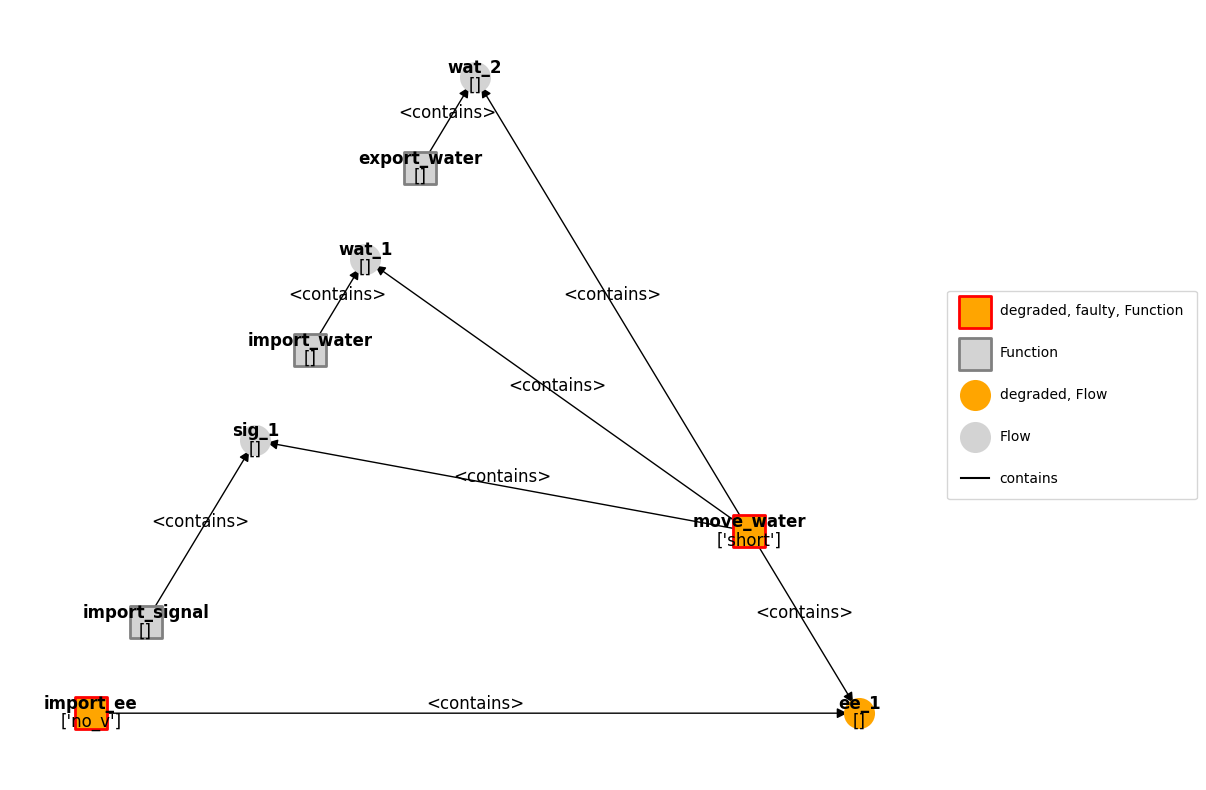

In [32]:
fig = endresults.graph.draw()

In [33]:
endresults.graph.g.nodes['move_water']

{'bipartite': 0,
 'label': 'Function',
 'states': {'eff': 0.0},
 'faults': ['short'],
 'indicators': [],
 'degraded': True,
 'faulty': True}

As can be seen, at the final t, the short causes a degraded flow of electricity as well as a fault in the Import EE function. 

**However**, we would imagine that the short would cause the water to stop moving also--so why is it not red?

The answer is that by default the degradations shown in the graph are shown at the **final time**, which is the same both for the failed model and the nominal model, since the pump is switched "off." In this case we might be more interested in looking at how the graph looks in operation, rather than at the end.

We can do that that in two ways:
- by specifying a different time to fetch the graph from (e.g., `desired_result={10:'graph'}`, or
- by reconstructing the based on the history of the plot, as shown below:

In [34]:
mg = FunctionArchitectureGraph(mdl)

To do this, we first need to track more states than have been specified to track in the model. The easiest way to do this is to set `track='all'`.

In [35]:
endresults, mdlhist_full=propagate.one_fault(mdl, 'move_water', 'short', time=10, track='all',
                                        desired_result=['graph','endclass','endfaults'])

We can then plot the state at any time in the history using `mg.draw_from`.

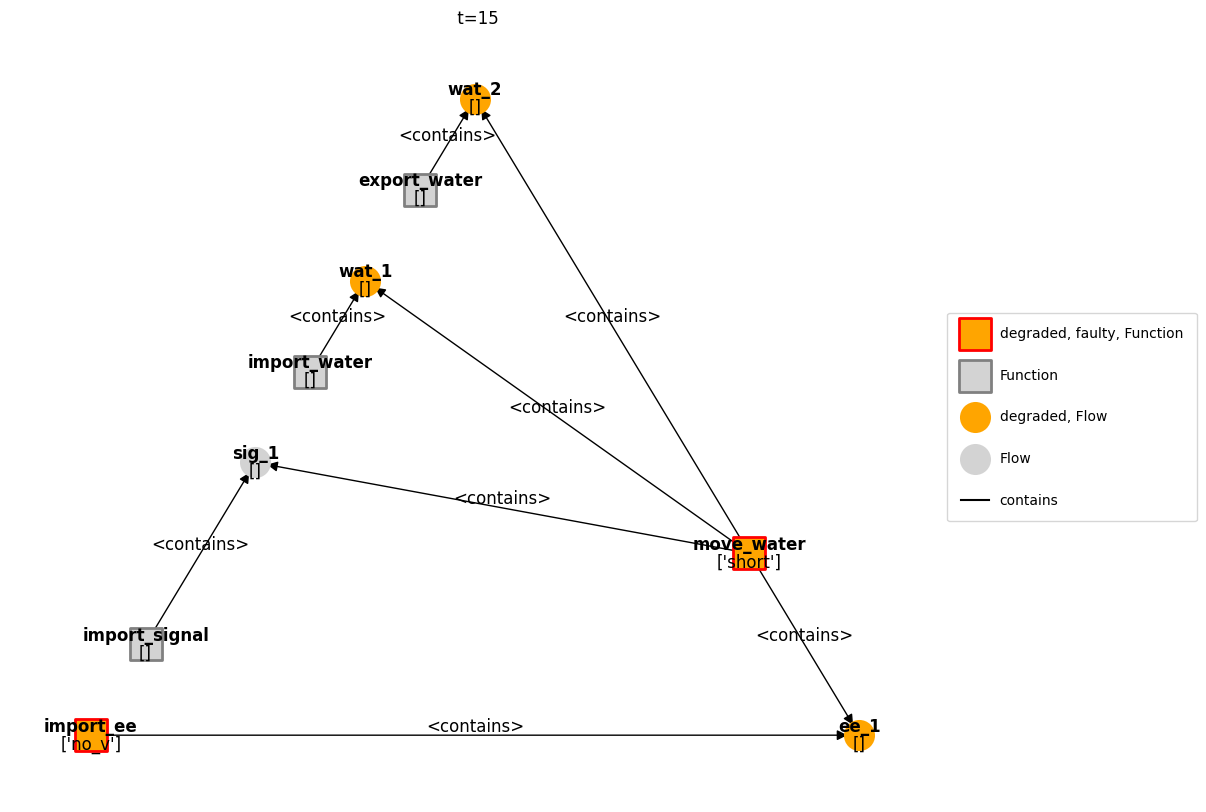

In [36]:
fig, ax = mg.draw_from(15, mdlhist_full)

As shown, this version has the degradation of the water, since at this time the off-nominal state is different from the nominal (no flow).

We can view an animation over time using:

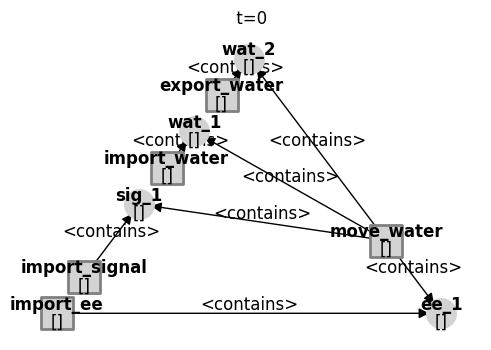

In [37]:
from IPython.display import HTML
ani = mg.animate(mdlhist_full)
HTML(ani.to_jshtml())

Note that if only a partial history is given, only partial results will be displayed (see below).

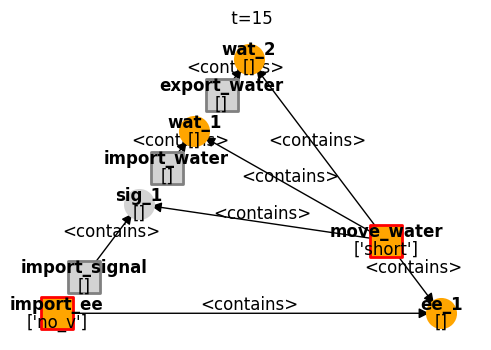

In [38]:
fig, ax = mg.draw_from(15, mdlhist, figsize=(6,4), withlegend=False)

We can also plot the states of this against the nominal run using:

In [39]:
mdlhist

nominal.i.finished:            array(56)
nominal.i.on:                  array(56)
nominal.flows.ee_1.s.current:  array(56)
nominal.flows.ee_1.s.voltage:  array(56)
nominal.flows.sig_1.s.power:   array(56)
nominal.flows.wat_1.s.flowrate: array(56)
nominal.flows.wat_1.s.pressure: array(56)
nominal.flows.wat_1.s.area:    array(56)
nominal.flows.wat_1.s.level:   array(56)
nominal.flows.wat_2.s.flowrate: array(56)
nominal.flows.wat_2.s.pressure: array(56)
nominal.flows.wat_2.s.area:    array(56)
nominal.flows.wat_2.s.level:   array(56)
nominal.fxns.import_ee.s.effstate: array(56)
nominal.fxns.import_ee.m.faults.no_v: array(56)
nominal.fxns.import_ee.m.faults.inf_v: array(56)
nominal.fxns.import_           array(56)
nominal.fxns.import_           array(56)
nominal.fxns.import_           array(56)
nominal.fxns.move_wa           array(56)
nominal.fxns.move_water.s.eff: array(56)
nominal.fxns.move_wa           array(56)
nominal.fxns.move_water.m.faults.short: array(56)
nominal.fxns.move_wa     

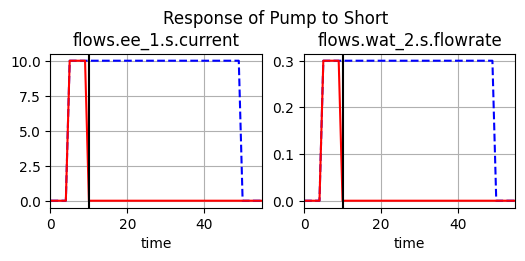

In [40]:
fig, axs = mdlhist.plot_line('flows.ee_1.s.current', 'flows.wat_2.s.flowrate', 
                             title="Response of Pump to Short", time_slice=10, legend_loc=False, title_padding=0.1)

As you can see, the system begins nominal until the fault is injected at $t=10$. At this moment, not only are the electrical energy flows degraded, the flow of water is degraded also. However, at $t=55$ when the system is supposed to be turned off, this flow of water is no longer "degraded" because it is in the same state as the nominal system.

We can look at a table of to see more precisely what happened (and export, if needed). Note that we need to give the plotting function the mode ('short') and the time for it to plot properly.

In [41]:
mdlhist.as_table()

nominal.i.finished  nominal.i.on  nominal.flows.ee_1.s.current  \
0                False         False                           0.0   
1                False         False                           0.0   
2                False         False                           0.0   
3                False         False                           0.0   
4                False         False                           0.0   
5                False          True                          10.0   
6                False          True                          10.0   
7                False          True                          10.0   
8                False          True                          10.0   
9                False          True                          10.0   
10               False          True                          10.0   
11               False          True                          10.0   
12               False          True                          10.0   
13               False          True                          10.0   
14               False          True                          10.0   
15               False          True                          10.0   
16               False          True                          10.0   
17               False          True                          10.0   
18               False          True                          10.0   
19               False          True                          10.0   
20               False          True                          10.0   
21               False          True                          10.0   
22               False          True                          10.0   
23               False          True                          10.0   
24               False          True                          10.0   
25               False          True                          10.0   
26               False          True                          10.0   
27               False          True                          10.0   
28               False          True                          10.0   
29               False          True                          10.0   
30               False          True                          10.0   
31               False          True                          10.0   
32               False          True                          10.0   
33               False          True                          10.0   
34               False          True                          10.0   
35               False          True                          10.0   
36               False          True                          10.0   
37               False          True                          10.0   
38               False          True                          10.0   
39               False          True                          10.0   
40               False          True                          10.0   
41               False          True                          10.0   
42               False          True                          10.0   
43               False          True                          10.0   
44               False          True                          10.0   
45               False          True                          10.0   
46               False          True                          10.0   
47               False          True                          10.0   
48               False          True                          10.0   
49               False          True                          10.0   
50               False         False                           0.0   
51               False         False                           0.0   
52               False         False                           0.0   
53               False         False                           0.0   
54               False         False                           0.0   
55               False         False                           0.0   

    nominal.f

Here we can see that the short dropped the voltage to zero, (this was because an open circuit resulted in the Import EE function), causing the water to stop flowing. Below, we use the processed model history to show the faults and *degradation* of states over time. In this case, 1 means nominal while 0 means degraded.

In [42]:
deghist = mdlhist_full.get_degraded_hist(*mdl.fxns, *mdl.flows)

In [43]:
deghist.as_table()[:20]

import_ee  import_water  import_signal  move_water  export_water   ee_1  \
0       False         False          False       False         False  False   
1       False         False          False       False         False  False   
2       False         False          False       False         False  False   
3       False         False          False       False         False  False   
4       False         False          False       False         False  False   
5       False         False          False       False         False  False   
6       False         False          False       False         False  False   
7       False         False          False       False         False  False   
8       False         False          False       False         False  False   
9       False         False          False       False         False  False   
10       True         False          False        True         False   True   
11       True         False          False        True         False   True   
12       True         False          False        True         False   True   
13       True         False          False        True         False   True   
14       True         False          False        True         False   True   
15       True         False          False        True         False   True   
16       True         False          False        True         False   True   
17       True         False          False        True         False   True   
18       True         False          False        True         False   True   
19       True         False          False        True         False   True   

    sig_1  wat_1  wat_2  total  time  
0   False  False  False      9   0.0  
1   False  False  False      9   1.0  
2   False  False  False      9   2.0  
3   False  False  False      9   3.0  
4   False  False  False      9   4.0  
5   False  False  False      9   5.0  
6   False  False  False      9   6.0  
7   False  False  False      9   7.0  
8   False  False  False      9   8.0  
9   False  False  False      9   9.0  
10  False   True   True      4  10.0  
11  False   True   True      4  11.0  
12  False   True   True      4  12.0  
13  False   True   True      4  13.0  
14  False   True   True      4  14.0  
15  False   True   True      4  15.0  
16  False   True   True      4  16.0  
17  False   True   True      4  17.0  
18  False   True   True      4  18.0  
19  False   True   True      4  19.0

We can also look at the faults over time...

In [44]:
faulthist = mdlhist_full.get_faulty_hist(*mdl.fxns)
faulthist.as_table()[0:20]

import_ee  import_water  import_signal  move_water  export_water  total  \
0       False         False          False       False         False      0   
1       False         False          False       False         False      0   
2       False         False          False       False         False      0   
3       False         False          False       False         False      0   
4       False         False          False       False         False      0   
5       False         False          False       False         False      0   
6       False         False          False       False         False      0   
7       False         False          False       False         False      0   
8       False         False          False       False         False      0   
9       False         False          False       False         False      0   
10       True         False          False        True         False      2   
11       True         False          False        True         False      2   
12       True         False          False        True         False      2   
13       True         False          False        True         False      2   
14       True         False          False        True         False      2   
15       True         False          False        True         False      2   
16       True         False          False        True         False      2   
17       True         False          False        True         False      2   
18       True         False          False        True         False      2   
19       True         False          False        True         False      2   

    time  
0    0.0  
1    1.0  
2    2.0  
3    3.0  
4    4.0  
5    5.0  
6    6.0  
7    7.0  
8    8.0  
9    9.0  
10  10.0  
11  11.0  
12  12.0  
13  13.0  
14  14.0  
15  15.0  
16  16.0  
17  17.0  
18  18.0  
19  19.0

We can also look at statistics of degradation over time using:

In [45]:
summ = mdlhist_full.get_fault_degradation_summary(*mdl.fxns, *mdl.flows)
summ.faulty

['import_ee', 'move_water']

In [46]:
summ.degraded

['import_ee',
 'import_water',
 'import_signal',
 'move_water',
 'export_water',
 'ee_1',
 'sig_1',
 'wat_1',
 'wat_2']

#### Blockage Fault

We can also look at other faults. The results below are for a blockage of the pipe. In this case we're only interested in the effect on the water going through, so only those flows are tracked.

In [47]:
endresults2, mdlhist2=propagate.one_fault(mdl, 'export_water', 'block', 
                                          time=10, desired_result=['endclass', 'graph', 'endfaults'])
summ = mdlhist_full.get_fault_degradation_summary(*mdl.fxns, *mdl.flows)

In [48]:
summ.faulty

['import_ee', 'move_water']

In [49]:
summ.degraded

['import_ee',
 'import_water',
 'import_signal',
 'move_water',
 'export_water',
 'ee_1',
 'sig_1',
 'wat_1',
 'wat_2']

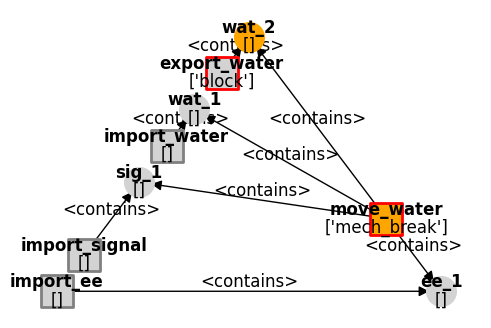

In [50]:
fig, ax = endresults2.graph.draw(figsize=(6,4), withlegend=False)

In [51]:
mdlhist

nominal.i.finished:            array(56)
nominal.i.on:                  array(56)
nominal.flows.ee_1.s.current:  array(56)
nominal.flows.ee_1.s.voltage:  array(56)
nominal.flows.sig_1.s.power:   array(56)
nominal.flows.wat_1.s.flowrate: array(56)
nominal.flows.wat_1.s.pressure: array(56)
nominal.flows.wat_1.s.area:    array(56)
nominal.flows.wat_1.s.level:   array(56)
nominal.flows.wat_2.s.flowrate: array(56)
nominal.flows.wat_2.s.pressure: array(56)
nominal.flows.wat_2.s.area:    array(56)
nominal.flows.wat_2.s.level:   array(56)
nominal.fxns.import_ee.s.effstate: array(56)
nominal.fxns.import_ee.m.faults.no_v: array(56)
nominal.fxns.import_ee.m.faults.inf_v: array(56)
nominal.fxns.import_           array(56)
nominal.fxns.import_           array(56)
nominal.fxns.import_           array(56)
nominal.fxns.move_wa           array(56)
nominal.fxns.move_water.s.eff: array(56)
nominal.fxns.move_wa           array(56)
nominal.fxns.move_water.m.faults.short: array(56)
nominal.fxns.move_wa     

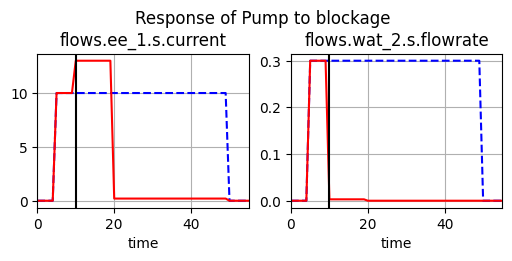

In [52]:
fig, axs = mdlhist2.plot_line('flows.ee_1.s.current', 'flows.wat_2.s.flowrate',
                              title = 'Response of Pump to blockage', time_slice=10, legend_loc=False, title_padding=0.1)

### Visualization of resilience metrics
We can also use the processed time history to now make visualizations of the resilience of the system over time. 

Here we calculate the percent time the simulation was decraded over the simulation interval:

In [53]:
deghist = mdlhist_full.get_degraded_hist(*mdl.fxns, *mdl.flows)
exp = deghist.get_metrics()

In [54]:
exp

import_ee:            0.8214285714285714
import_water:                        0.0
import_signal:                       0.0
move_water:           0.8214285714285714
export_water:                        0.0
ee_1:                 0.8214285714285714
sig_1:                               0.0
wat_1:                0.7142857142857143
wat_2:                0.7142857142857143
total:                 5.107142857142857
time:                               27.5

These metrics (and others like them) can then be overlayed as a heatmap using `set_heatmap`.

(<Figure size 1200x1000 with 1 Axes>, <Axes: >)

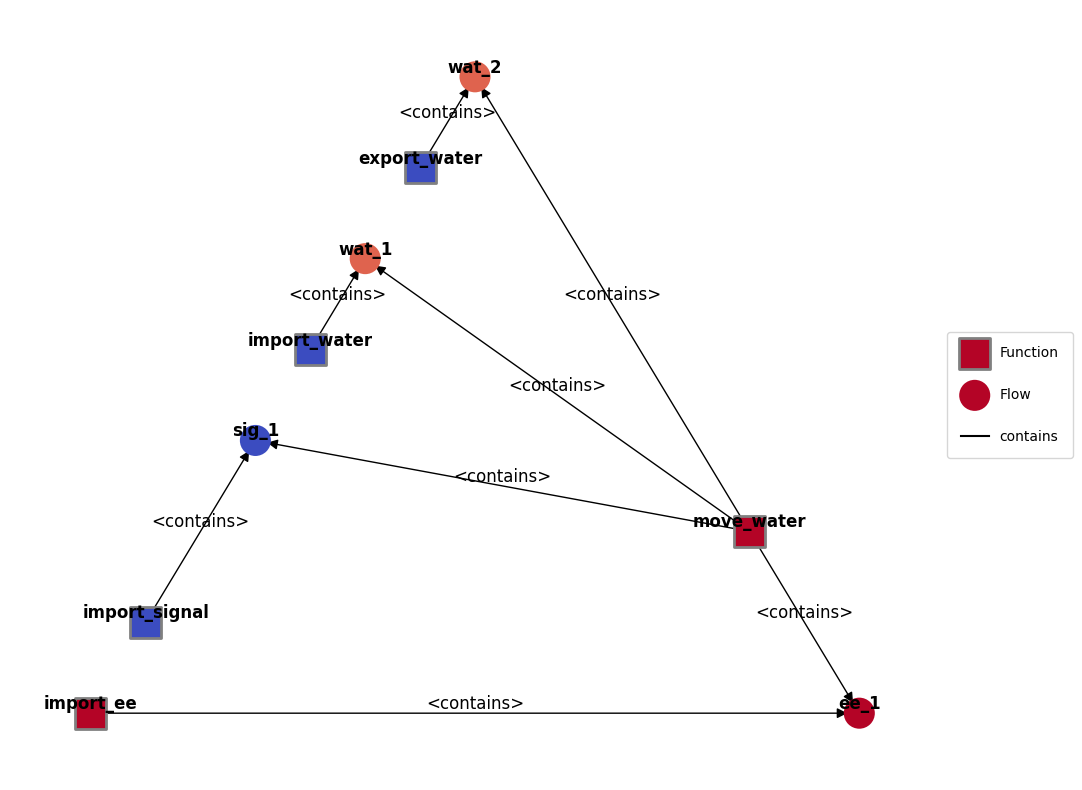

In [55]:
mg = FunctionArchitectureGraph(mdl)
mg.set_heatmap(exp)
mg.draw()

Network metrics can also be overlaid on the graphs:

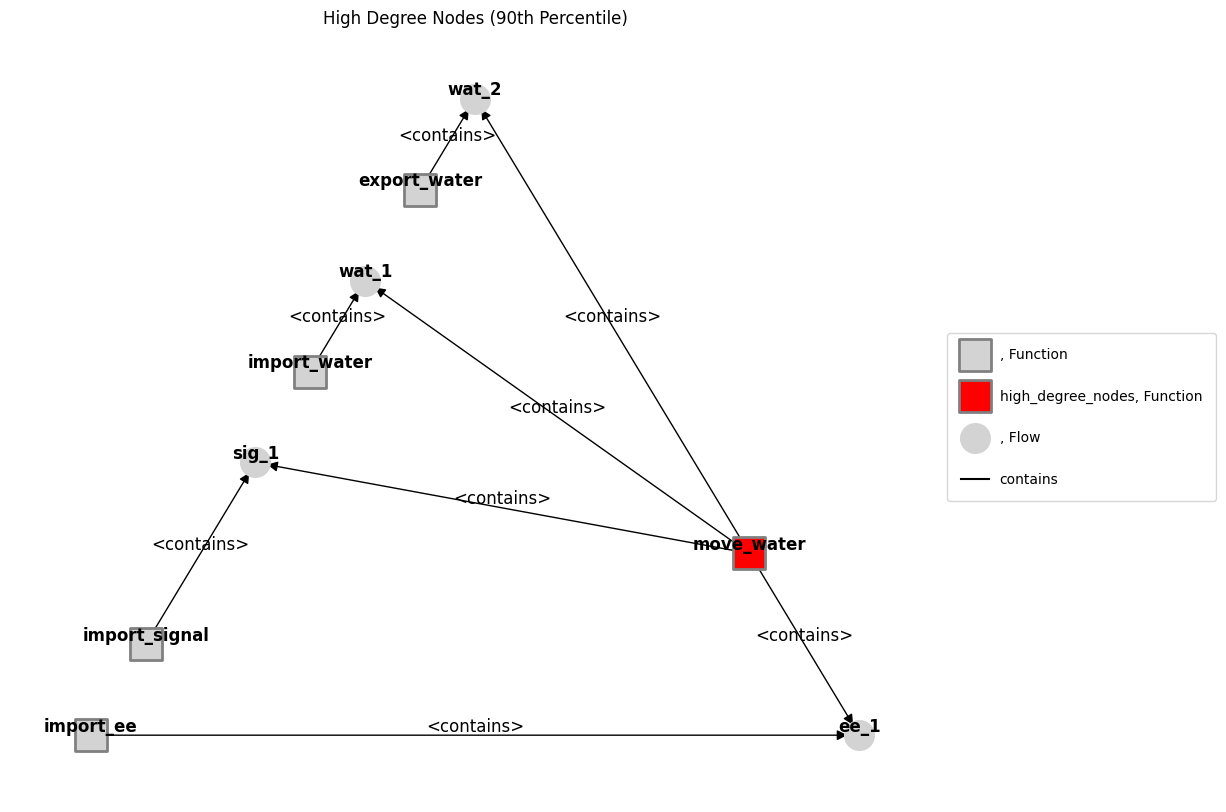

In [56]:
mg = FunctionArchitectureGraph(mdl)
fig, ax = mg.plot_high_degree_nodes()

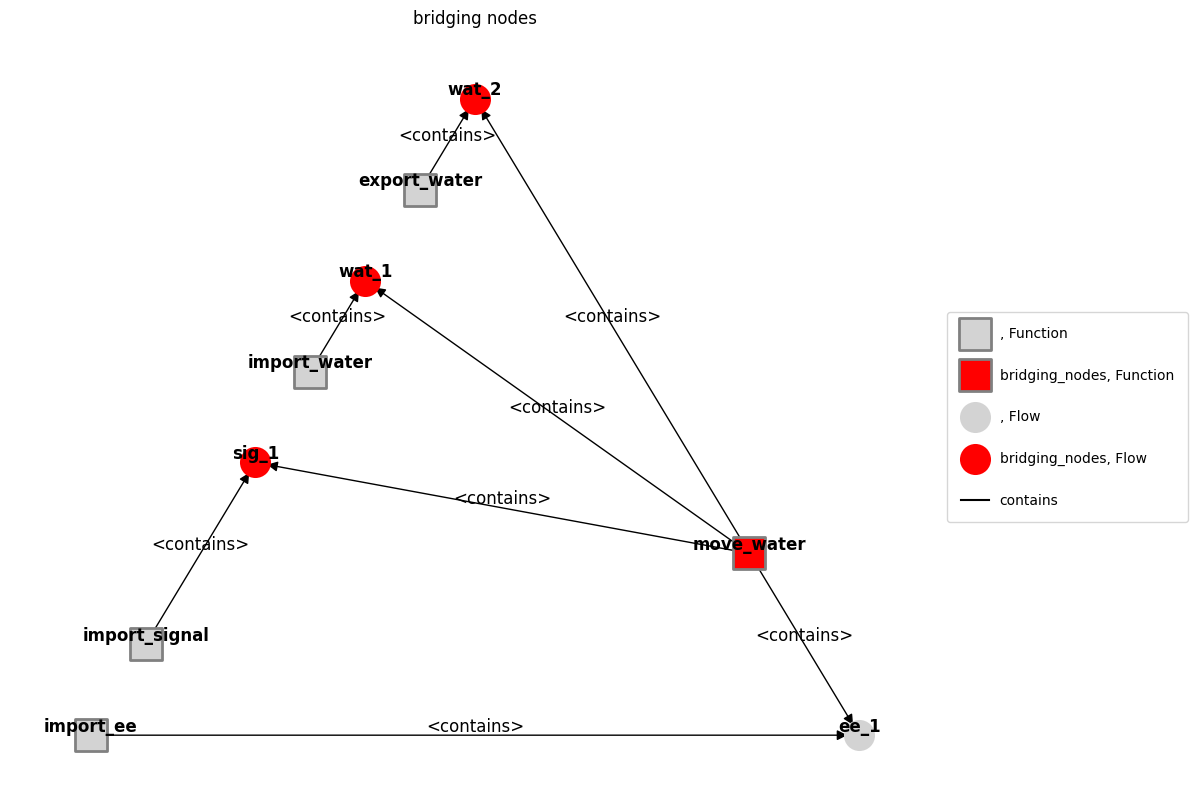

In [57]:
mg = FunctionArchitectureGraph(mdl)
fig, ax = mg.plot_bridging_nodes()

### Running a List of Faults
Finally, to get the results of all of the single-fault scenarios defined in the model, we can run them all at once using the `single_faults()` function. Note that this will propagate faults based on the times vector put in the model it will propogate the faults at the begining, end, and at t=15 and t=15. This function only takes in the model mdl and outputs two similar kinds of output--resultsdict (the results in a python dictionary) and resultstab (the results in a nice tabular form). 

Note that the rates provide for this table do not use the opportunity vector information, instead using the assumption that the fault scenario has the rate provided over the entire simulation.

See below:

In [58]:
endclasses, mdlhists=propagate.single_faults(mdl, staged=True, track="all")

SCENARIOS COMPLETE: 100%|██████████| 8/8 [00:00<00:00, 49.32it/s]


We can visualize the metrics for each scenario using `Result.create_simple_fmea`

In [59]:
endclasses.create_simple_fmea()

rate     cost  expected_cost
import_ee_no_v_t0p0         0.000008  20125.0        16100.0
import_ee_inf_v_t0p0        0.000002  25125.0         5025.0
import_water_no_wat_t0p0    0.000010  11125.0        11125.0
import_water_less_wat_t0p0  0.000010   5062.5         5062.5
import_signal_no_sig_t0p0   0.000001  20125.0         2012.5
move_water_mech_break_t0p0  0.000006  15125.0         9075.0
move_water_short_t0p0       0.000010  30125.0        30125.0
export_water_block_t0p0     0.000010  20102.5        20102.5
nominal                     1.000000      0.0            0.0

We can see corresponding degradations using `tabulate.result_summary.fmea()`

In [60]:
fullfmea = an.tabulate.result_summary_fmea(endclasses, mdlhists, *mdl.fxns, *mdl.flows)
fullfmea[:10]

degraded  \
import_ee_no_v_t0p0         ['import_water', 'import_signal', 'move_water'...   
import_ee_inf_v_t0p0        ['import_water', 'import_signal', 'move_water'...   
import_water_no_wat_t0p0    ['import_ee', 'import_signal', 'move_water', '...   
import_water_less_wat_t0p0  ['import_ee', 'import_signal', 'move_water', '...   
import_signal_no_sig_t0p0   ['import_ee', 'import_water', 'move_water', 'e...   
move_water_mech_break_t0p0  ['import_ee', 'import_water', 'import_signal',...   
move_water_short_t0p0       ['import_ee', 'import_water', 'import_signal',...   
export_water_block_t0p0     ['import_ee', 'import_water', 'import_signal',...   
nominal                     ['import_ee', 'import_water', 'import_signal',...   

                                                    faulty      rate     cost  \
import_ee_no_v_t0p0                          ['import_ee']  0.000008  20125.0   
import_ee_inf_v_t0p0                         ['import_ee']  0.000002  25125.0   
import_water_no_wat_t0p0                  ['import_water']   0.00001  11125.0   
import_water_less_wat_t0p0                ['import_water']   0.00001   5062.5   
import_signal_no_sig_t0p0                ['import_signal']  0.000001  20125.0   
move_water_mech_break_t0p0                  ['move_water']  0.000006  15125.0   
move_water_short_t0p0          ['import_ee', 'move_water']   0.00001  30125.0   
export_water_block_t0p0     ['move_water', 'export_water']   0.00001  20102.5   
nominal                                                 []       1.0      0.0   

                           expected_cost  
import_ee_no_v_t0p0              16100.0  
import_ee_inf_v_t0p0              5025.0  
import_water_no_wat_t0p0         11125.0  
import_water_less_wat_t0p0        5062.5  
import_signal_no_sig_t0p0         2012.5  
move_water_mech_break_t0p0        9075.0  
move_water_short_t0p0            30125.0  
export_water_block_t0p0          20102.5  
nominal                              0.0

### Running a Fault Sampling Approach
Note that only gives accurate results for costs and fault responses--in order to get an accurate idea of *expected cost*, we instead run a FaultSample or SampleApproach, which develops an underlying probability model for faults. See below.

In [61]:
from fmdtools.sim.sample import FaultDomain, FaultSample

fd = FaultDomain(mdl)
fd.add_all()
fd

FaultDomain with faults:
 -('import_ee', 'no_v')
 -('import_ee', 'inf_v')
 -('import_water', 'no_wat')
 -('import_water', 'less_wat')
 -('import_signal', 'no_sig')
 -('move_water', 'mech_break')
 -('move_water', 'short')
 -('export_water', 'block')

In [62]:
from fmdtools.analyze.phases import PhaseMap
fs = FaultSample(fd, phasemap=PhaseMap(mdl.sp.phases))
fs.add_fault_phases()
fs

FaultSample of scenarios: 
 - import_ee_no_v_t2p0
 - import_ee_inf_v_t2p0
 - import_water_no_wat_t2p0
 - import_water_less_wat_t2p0
 - import_signal_no_sig_t2p0
 - move_water_mech_break_t2p0
 - move_water_short_t2p0
 - export_water_block_t2p0
 - import_ee_no_v_t27p0
 - import_ee_inf_v_t27p0
 - ... (24 total)

In [63]:
endclasses, mdlhists=propagate.fault_sample(mdl, fs, staged=True, track="all")
simplefmea = endclasses.create_simple_fmea() #note the costs are the same, but the rates and expected costs are not
simplefmea[:5]

SCENARIOS COMPLETE: 100%|██████████| 24/24 [00:00<00:00, 64.11it/s]


rate     cost  expected_cost
import_ee_no_v_t2p0         0.000000  20125.0           0.00
import_ee_inf_v_t2p0        0.000000  25125.0           0.00
import_water_no_wat_t2p0    0.000010  11125.0       11125.00
import_water_less_wat_t2p0  0.000010   5062.5        5062.50
import_signal_no_sig_t2p0   0.000002  20125.0        3018.75

We can now summarize the risks of faults over the operational phases and overall using the `FMEA` class:

In [64]:
phasefmea = an.tabulate.FMEA(endclasses, fs, group_by=('function', 'fault', 'phase'))
phasefmea.as_table()

rate       cost  expected_cost
move_water    short      start  1.500000e-05  37656.250       0.451875
export_water  block      start  1.500000e-05  25128.125       0.301538
move_water    short      on     1.000000e-05  25175.000       0.251750
export_water  block      on     1.000000e-05  15152.500       0.151525
import_ee     no_v       on     8.000000e-06  13657.500       0.121400
import_water  no_wat     start  1.000000e-05  11125.000       0.111250
move_water    short      end    1.000000e-05  10000.000       0.100000
              mech_break on     7.200000e-06   8750.500       0.073260
import_water  no_wat     on     1.000000e-05   6175.000       0.061750
              less_wat   start  1.000000e-05   5062.500       0.050625
export_water  block      end    1.000000e-05   5000.000       0.050000
import_ee     inf_v      on     2.000000e-06  12105.000       0.040350
import_signal no_sig     start  1.500000e-06  11571.875       0.030188
import_water  less_wat   on     1.000000e-05   2587.500       0.025875
import_signal no_sig     on     1.000000e-06   8346.250       0.015175
                         end    1.000000e-06   5500.000       0.010000
import_water  no_wat     end    1.000000e-05   1000.000       0.010000
move_water    mech_break start  6.000000e-07   8016.250       0.009075
                         end    6.000000e-07   2650.000       0.003000
import_ee     no_v       end    0.000000e+00   5000.000       0.000000
                         start  0.000000e+00  10062.500       0.000000
import_water  less_wat   end    1.000000e-05      0.000       0.000000
import_ee     inf_v      start  0.000000e+00  12562.500       0.000000
                         end    0.000000e+00   2500.000       0.000000

In [65]:
summfmea = an.tabulate.FMEA(endclasses, fs)
summfmea.as_table()

rate          cost  expected_cost
move_water    short       0.000035  24277.083333       0.803625
export_water  block       0.000035  15093.541667       0.503063
import_water  no_wat      0.000030   6100.000000       0.183000
import_ee     no_v        0.000008   9573.333333       0.121400
move_water    mech_break  0.000008   6472.250000       0.085335
import_water  less_wat    0.000030   2550.000000       0.076500
import_signal no_sig      0.000003   8472.708333       0.055363
import_ee     inf_v       0.000002   9055.833333       0.040350

#### History visualization

We can further overlay expected resilience metrics on the model over fault scenarios using various methods provided with `History` and `Result`.

Below we get the expected values of the history values:

In [66]:
hist_expected = mdlhists.get_expected(app=fs, with_nominal=True)

Next we get the expected degradations:

In [67]:
deg=hist_expected.get_degraded_hist(*mdl.flows, *mdl.fxns, nomhist=mdlhists.nominal)

In [68]:
deg

ee_1:                          array(56)
sig_1:                         array(56)
wat_1:                         array(56)
wat_2:                         array(56)
import_ee:                     array(56)
move_water:                    array(56)
total:                         array(56)
time:                          array(56)

In [69]:
import numpy as np
heatmap = deg.get_metrics(metric=np.mean)


These metrics can in turn be overlayed on the graph using `set_heatmap`.

(<Figure size 1200x1000 with 1 Axes>, <Axes: >)

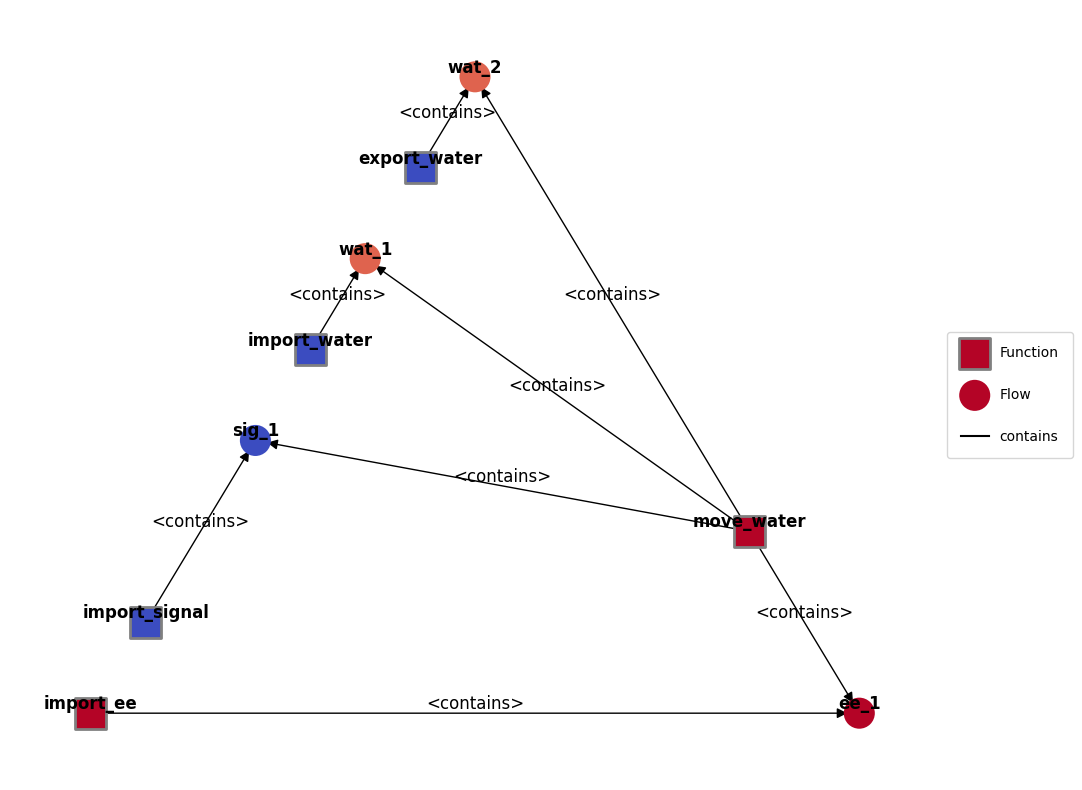

In [70]:
from fmdtools.analyze.graph import FunctionArchitectureGraph
mg = FunctionArchitectureGraph(mdl)
mg.set_heatmap(exp)
mg.draw()

## Save/Load

In detailed simulations, running a lot of computational simulations can take a considerable amount of time. As a result, it becomes impractical to run a new simulation every time one wishes to analyse its data. Results from fmdtools simulations (endclasses or mdlhists) can be saved as pickle, csv, or json files in this instance using either:
- `Result.save` or `History.save` or 
- passing a save_args dictionary to the respective propagate functions (e.g., {'endclass':{'filename':'file.pkl','overwrite':True})

and then loaded using:
- `Result.load` or `History.load`

In [71]:
mdlhists

import_ee_no_v_t2p0.i.finished: array(56)
import_ee_no_v_t2p0.i.on:      array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.flows.wat_1.s.area: array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.flows.wat_2.s.area: array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(5

This saves a history to a file:

In [72]:
mdlhists.save("example_mdlhist.npz", overwrite=True)

File already exists: example_mdlhist.npz, writing anyway...


And this loads this history:

In [73]:
mdlhists_saved  = an.history.History.load("example_mdlhist.npz")

In [74]:
mdlhists_saved 

import_ee_no_v_t2p0.i.finished: array(56)
import_ee_no_v_t2p0.i.on:      array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.flows.wat_1.s.area: array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.flows.wat_2.s.area: array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(56)
import_ee_no_v_t2p0.           array(5

Note that there are different trade-offs to using different file formats:
- `npz` is the serialization format provided in numpy, which is fast but not human readable
- `csv` outputs as comma separated values, which are slower and less robust (in terms of data types), but are human-readable and can be opened in a spreadsheet software like excel.
- `json` is similar to csv, but is less human readable.